In [237]:
!pip install matplotlib
!pip install sklearn

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

You should consider upgrading via the 'python -m pip install --upgrade pip' command.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



# 2. Data Understanding

In [238]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [239]:
df[['SEVERITYCODE', 'EXCEPTRSNCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'SPEEDING']].head()

,SEVERITYCODE,EXCEPTRSNCODE,SEGLANEKEY,CROSSWALKKEY,SPEEDING
0,2,,0,0,NaN
1,1,NaN,0,0,NaN
2,1,NaN,0,0,NaN
3,1,,0,0,NaN
4,2,NaN,0,0,NaN


In [240]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [241]:
# Get all unique value in a column
df['ST_COLCODE'].unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', ' ', '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82, 67, '54', '60',
       53, 43, 87, 54, '87', nan, '7', '8', '85', '88', '18'],
      dtype=object)

In [242]:
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [243]:
# look at the info of "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [244]:
df.shape

(194673, 38)

# 3. Data Preparation, Cleaning and Visualization

In [245]:
df = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'COLLISIONTYPE', 'ST_COLCODE', 'SDOT_COLCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']]

df.head


<bound method NDFrame.head of         SEVERITYCODE   WEATHER ROADCOND                LIGHTCOND  \
0                  2  Overcast      Wet                 Daylight   
1                  1   Raining      Wet  Dark - Street Lights On   
2                  1  Overcast      Dry                 Daylight   
3                  1     Clear      Dry                 Daylight   
4                  2   Raining      Wet                 Daylight   
...              ...       ...      ...                      ...   
194668             2     Clear      Dry                 Daylight   
194669             1   Raining      Wet                 Daylight   
194670             2     Clear      Dry                 Daylight   
194671             2     Clear      Dry                     Dusk   
194672             1     Clear      Wet                 Daylight   

            ADDRTYPE COLLISIONTYPE ST_COLCODE  SDOT_COLCODE  PERSONCOUNT  \
0       Intersection        Angles         10            11            2   
1

In [246]:
# Check missing data
missing_data = df.isnull()
missing_data.head(5)


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,COLLISIONTYPE,ST_COLCODE,SDOT_COLCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False


In [247]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

ST_COLCODE
False    194655
True         18
Name: ST_COLCODE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       488

In [248]:
# Option 1: Drop row with missing value
df.replace("?", np.nan, inplace = True)
# df.dropna(subset=["price"], axis=0)

df.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,COLLISIONTYPE,ST_COLCODE,SDOT_COLCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Overcast,Wet,Daylight,Intersection,Angles,10,11,2,0,0,2,At Intersection (intersection related),NaN,N,NaN,NaN,N
1,1,Raining,Wet,Dark - Street Lights On,Block,Sideswipe,11,16,2,0,0,2,Mid-Block (not related to intersection),NaN,0,NaN,NaN,N
2,1,Overcast,Dry,Daylight,Block,Parked Car,32,14,4,0,0,3,Mid-Block (not related to intersection),NaN,0,NaN,NaN,N
3,1,Clear,Dry,Daylight,Block,Other,23,11,3,0,0,3,Mid-Block (not related to intersection),NaN,N,NaN,NaN,N
4,2,Raining,Wet,Daylight,Intersection,Angles,10,11,2,0,0,2,At Intersection (intersection related),NaN,0,NaN,NaN,N


In [249]:
# Replace weather missing data with most appear weather value (Clear)
df['WEATHER'].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace = True)

# Replace unknown weather with most appear weather value (Clear)
df['WEATHER'].replace('Unknown', df['WEATHER'].value_counts().idxmax(), inplace = True)

# Replace weather value with number
df['WEATHER'].replace(to_replace=['Other','Clear','Partly Cloudy','Overcast','Fog/Smog/Smoke','Raining','Snowing','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind'], value=[1,2,3,4,5,6,7,8,9,10],inplace=True)

df['WEATHER'].value_counts()

2     131307
6      33145
4      27714
7        907
1        832
5        569
8        113
9         56
10        25
3          5
Name: WEATHER, dtype: int64

In [250]:
# Replace road condition missing data with most appear road condition value
df['ROADCOND'].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace = True)

# Replace unknown road condition with most appear road condition value
df['ROADCOND'].replace('Unknown', df['ROADCOND'].value_counts().idxmax(), inplace = True)

# Replace road condition value with number
df['ROADCOND'].replace(to_replace=['Other','Dry','Wet','Sand/Mud/Dirt','Snow/Slush','Ice','Standing Water','Oil'], value=[1,2,3,4,5,6,7,8],inplace=True)

df['ROADCOND'].value_counts()

2    144600
3     47474
6      1209
5      1004
1       132
7       115
4        75
8        64
Name: ROADCOND, dtype: int64

In [251]:
# Replace missing data with most appeared value
df['LIGHTCOND'].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace = True)

# Replace unknown value with most appeared value
df['LIGHTCOND'].replace('Unknown', df['LIGHTCOND'].value_counts().idxmax(), inplace = True)

# Replace value with number
df['LIGHTCOND'].replace(to_replace=['Other','Daylight','Dark - Street Lights On','Dawn','Dusk','Dark - Street Lights Off','Dark - No Street Lights','Dark - Unknown Lighting'], value=[1,2,3,4,5,6,7,8],inplace=True)

df['LIGHTCOND'].value_counts()

2    134780
3     48507
5      5902
4      2502
7      1537
6      1199
1       235
8        11
Name: LIGHTCOND, dtype: int64

In [252]:
# Replace missing data with most appeared value
df['ST_COLCODE'].replace(np.nan, df['ST_COLCODE'].value_counts().idxmax(), inplace = True)
df['ST_COLCODE'].replace(' ', df['ST_COLCODE'].value_counts().idxmax(), inplace = True)

In [253]:
# Replace missing data with most appeared value
df['JUNCTIONTYPE'].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace = True)

# Replace unknown value with most appeared value
df['JUNCTIONTYPE'].replace('Unknown', df['JUNCTIONTYPE'].value_counts().idxmax(), inplace = True)

# Replace value with number
df['JUNCTIONTYPE'].replace(to_replace=['Mid-Block (not related to intersection)','Mid-Block (but intersection related)','At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Ramp Junction'], value=[1,2,3,4,5,6],inplace=True)

df['JUNCTIONTYPE'].value_counts()

1    96138
4    62810
2    22790
5    10671
3     2098
6      166
Name: JUNCTIONTYPE, dtype: int64

In [254]:
df['UNDERINFL'].replace('N', 0, inplace = True)
df['UNDERINFL'].replace('0', 0, inplace = True)
df['UNDERINFL'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace('1', 1, inplace = True)

# Replace missing data with most appeared value
df['UNDERINFL'].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace = True)

df[['UNDERINFL']].value_counts()

UNDERINFL
0.0          185552
1.0            9121
dtype: int64

In [255]:
df['HITPARKEDCAR'].replace('N', 0, inplace = True)
df['HITPARKEDCAR'].replace('Y', 1, inplace = True)

In [256]:
df[['HITPARKEDCAR']].value_counts()

HITPARKEDCAR
0               187457
1                 7216
dtype: int64

In [257]:
# Re-Check missing data
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

ST_COLCODE
False    194673
Name: ST_COLCODE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

PEDROWNOTGRNT
True     190006
False      4667
Name: PEDROWNOTGR

In [258]:
# Option 2: Replace missing values with mean
# avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
# df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [259]:
# df['due_date'] = pd.to_datetime(df['due_date'])
# df['effective_date'] = pd.to_datetime(df['effective_date'])
# df.head()

In [260]:
# reset index, because we droped two rows
# df.reset_index(drop=True, inplace=True)

In [261]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
# df['city-L/100km'] = 235/df["city-mpg"]

In [262]:
# replace (original value) by (original value)/(maximum value)
# df['length'] = df['length']/df['length'].max()

In [263]:
# Binning: Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
# In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

# df["horsepower"]=df["horsepower"].astype(int, copy=True)
# bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
# group_names = ['Low', 'Medium', 'High']

# df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
# df[['horsepower','horsepower-binned']].head(20)

In [264]:
# Indicator variable (or dummy variable)/One hot encoding
# An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 

# dummy_variable_1 = pd.get_dummies(df["fuel-type"])
# dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

# dummy_variable_1.head()

In [265]:
# merge data frame "df" and "dummy_variable_1" 
# df = pd.concat([df, dummy_variable_1], axis=1)

# # drop original column "fuel-type" from "df"
# df.drop("fuel-type", axis = 1, inplace=True)
# df.head()

## 3.2 Data Visualization

In [266]:
Feature = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'SDOT_COLCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'HITPARKEDCAR']]
Feature.head(10)

,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SDOT_COLCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,HITPARKEDCAR
0,4,3,2,10,11,2,0,0,2,4,0.0,0
1,6,3,3,11,16,2,0,0,2,1,0.0,0
2,4,2,2,32,14,4,0,0,3,1,0.0,0
3,2,2,2,23,11,3,0,0,3,1,0.0,0
4,6,3,2,10,11,2,0,0,2,4,0.0,0
5,2,2,2,10,11,2,0,0,2,4,0.0,0
6,6,3,2,10,11,2,0,0,2,4,0.0,0
7,2,2,2,5,51,3,0,1,1,4,0.0,0
8,2,2,2,32,11,2,0,0,2,1,0.0,0
9,2,2,2,10,11,2,0,0,2,4,0.0,0


In [267]:
%%capture
! pip install seaborn

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline 

In [269]:
df.corr()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SDOT_COLCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,HITPARKEDCAR
SEVERITYCODE,1.000000,0.040101,0.015846,-0.001432,0.188905,0.130949,0.246338,0.214218,-0.054686,0.196067,0.044377,-0.101498
WEATHER,0.040101,1.000000,0.652524,0.140419,0.066092,0.025700,0.031209,-0.028865,0.034073,0.049726,0.018618,-0.046111
ROADCOND,0.015846,0.652524,1.000000,0.126742,0.073655,0.006089,0.015058,-0.031200,0.014855,0.007637,0.012990,-0.031569
LIGHTCOND,-0.001432,0.140419,0.126742,1.000000,0.078630,0.000154,0.024707,-0.011297,0.011627,-0.019714,0.140540,0.006777
SDOT_COLCODE,0.188905,0.066092,0.073655,0.078630,1.000000,-0.128960,0.260393,0.382521,-0.365814,-0.012956,0.106783,-0.095144
PERSONCOUNT,0.130949,0.025700,0.006089,0.000154,-0.128960,1.000000,-0.023464,-0.038809,0.380523,0.076456,0.022420,-0.052766
PEDCOUNT,0.246338,0.031209,0.015058,0.024707,0.260393,-0.023464,1.000000,-0.016920,-0.261285,0.120391,0.016592,-0.035264
PEDCYLCOUNT,0.214218,-0.028865,-0.031200,-0.011297,0.382521,-0.038809,-0.016920,1.000000,-0.253773,0.095942,-0.016401,-0.030187
VEHCOUNT,-0.054686,0.034073,0.014855,0.011627,-0.365814,0.380523,-0.261285,-0.253773,1.000000,-0.060202,0.006609,0.048845
JUNCTIONTYPE,0.196067,0.049726,0.007637,-0.019714,-0.012956,0.076456,0.120391,0.095942,-0.060202,1.000000,-0.053781,-0.149645


In [270]:
# Set column as index - useful for quickly looking up using .loc method.
# df_can.set_index('SEVERITYCODE', inplace=True)

# df.loc['Iceland', years].plot(kind='bar', figsize=(10, 6))

# plt.xlabel('Year') # add to x-label to the plot
# plt.ylabel('Number of immigrants') # add y-label to the plot
# plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

# plt.show()

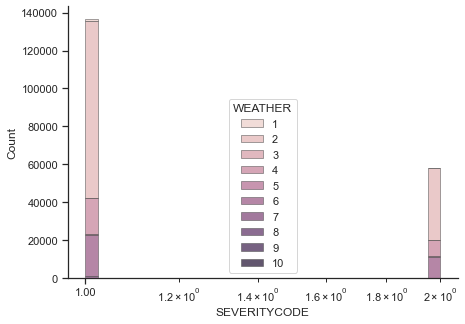

In [275]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="SEVERITYCODE", hue="WEATHER",
    multiple="stack",
    # palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

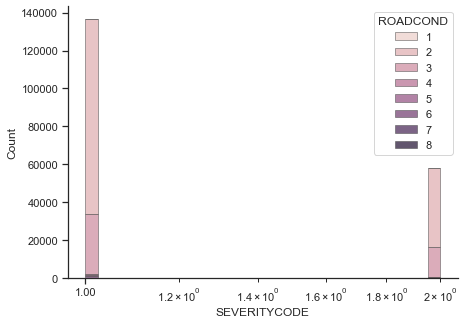

In [276]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="SEVERITYCODE", hue="ROADCOND",
    multiple="stack",
    # palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

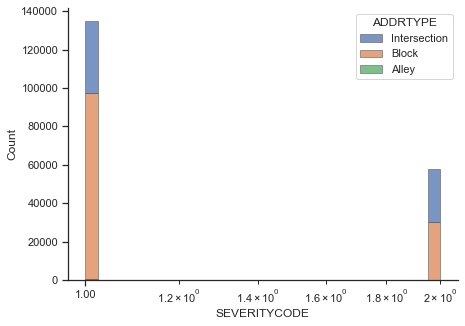

In [278]:

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="SEVERITYCODE", hue="ADDRTYPE",
    multiple="stack",
    # palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

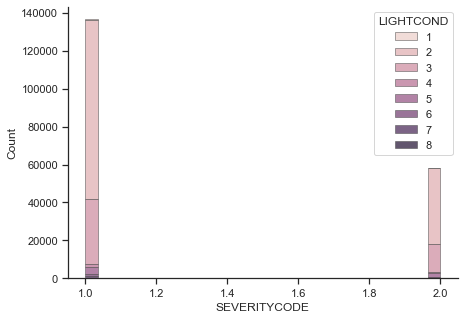

In [279]:

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="SEVERITYCODE", hue="LIGHTCOND",
    multiple="stack",
    # palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

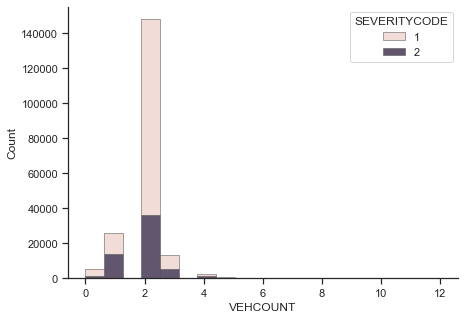

In [280]:

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="VEHCOUNT", hue="SEVERITYCODE",
    multiple="stack",
    # palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [281]:
df_coll.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Overcast,Wet,Daylight,Intersection,Angles,2,0,0,2,At Intersection (intersection related),NaN,N,NaN,NaN,N
1,1,Raining,Wet,Dark - Street Lights On,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),NaN,0,NaN,NaN,N
2,1,Overcast,Dry,Daylight,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),NaN,0,NaN,NaN,N
3,1,Clear,Dry,Daylight,Block,Other,3,0,0,3,Mid-Block (not related to intersection),NaN,N,NaN,NaN,N
4,2,Raining,Wet,Daylight,Intersection,Angles,2,0,0,2,At Intersection (intersection related),NaN,0,NaN,NaN,N


In [282]:
df_coll['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [283]:
# sns.set_theme(style="ticks")

# sns.pairplot(df_coll[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'COLLISIONTYPE']], hue="WEATHER")

In [284]:
# Scatter plot
# plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
# plt.xlabel("FUELCONSUMPTION_COMB")
# plt.ylabel("Emission")
# plt.show()

In [285]:
# grouping results
# df_gptest = df[['drive-wheels','body-style','price']]
# grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
# grouped_test1

In [286]:
# grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
# grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
# grouped_pivot

In [287]:
#use the grouped results
# plt.pcolor(grouped_pivot, cmap='RdBu')
# plt.colorbar()
# plt.show()

In [288]:
# Heatmap
# fig, ax = plt.subplots()
# im = ax.pcolor(grouped_pivot, cmap='RdBu')

# #label names
# row_labels = grouped_pivot.columns.levels[1]
# col_labels = grouped_pivot.index

# #move ticks and labels to the center
# ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
# ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# #insert labels
# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(col_labels, minor=False)

# #rotate label if too long
# plt.xticks(rotation=90)

# fig.colorbar(im)
# plt.show()

In [289]:
# Pearson Correlation
# from scipy import stats

# pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
# print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

In [290]:
# ANOVA: Analysis of Variance

# df_gptest = df[['drive-wheels','body-style','price']]
# grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
# grouped_test2.head(2)

# df_gptest

In [291]:
# grouped_test2.get_group('4wd')['price']

In [292]:
# f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
# print( "ANOVA results: F=", f_val, ", P =", p_val)   

# Pre-processing:  Feature selection/extraction

In [293]:
X = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'SDOT_COLCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'HITPARKEDCAR']].values.astype(float)


In [294]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

### Normalize data

In [295]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.63446316,  1.2283806 , -0.51710491, -0.90868474, -0.41751024,
        -0.33020207, -0.18743029, -0.16958841,  0.12553783,  1.12760028,
        -0.2217116 , -0.19619929],
       [ 1.90351986,  1.2283806 ,  0.68806173, -0.83925654,  0.31042563,
        -0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.89812187,
        -0.2217116 , -0.19619929],
       [ 0.63446316, -0.4997803 , -0.51710491,  0.61873562,  0.01925128,
         1.15576451, -0.18743029, -0.16958841,  1.7102107 , -0.89812187,
        -0.2217116 , -0.19619929],
       [-0.63459354, -0.4997803 , -0.51710491, -0.00611816, -0.41751024,
         0.41278122, -0.18743029, -0.16958841,  1.7102107 , -0.89812187,
        -0.2217116 , -0.19619929],
       [ 1.90351986,  1.2283806 , -0.51710491, -0.90868474, -0.41751024,
        -0.33020207, -0.18743029, -0.16958841,  0.12553783,  1.12760028,
        -0.2217116 , -0.19619929]])

# 4. Modeling

## Classification using K Nearest Neighbor(KNN)

In [296]:
# Train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 12) (155738,)
Test set: (38935, 12) (38935,)


In [297]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [298]:

k = 4
#Train Model and Predict  
knnmodel = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)


# 5. Model Evaluation

In [299]:
yhat=neigh.predict(X_test)

# mean_acc = metrics.accuracy_score(y_test, yhat)
# std_acc=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# print( "The accuracy was ", mean_acc, "with k=", k) 
# print(mean_acc)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knnmodel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7581836160731485
Test set Accuracy:  0.7449081803005009
